In [64]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd

Statistic date in format YYYY-MM-DD
leave string empty as '' to get global statistic

In [132]:
date = '2014-06-08'

In [133]:
db_filename = 'dinofunworld.db'
connection = sqlite3.connect(db_filename)
cursor = connection.cursor()


def execute_query(query: str) -> str:
    formatted_date = f"'{date}%'"
    formatted_query = query.format(formatted_date)

    return cursor.execute(formatted_query).fetchall()

A Pie Chart depicting visits to thrill ride attractions.

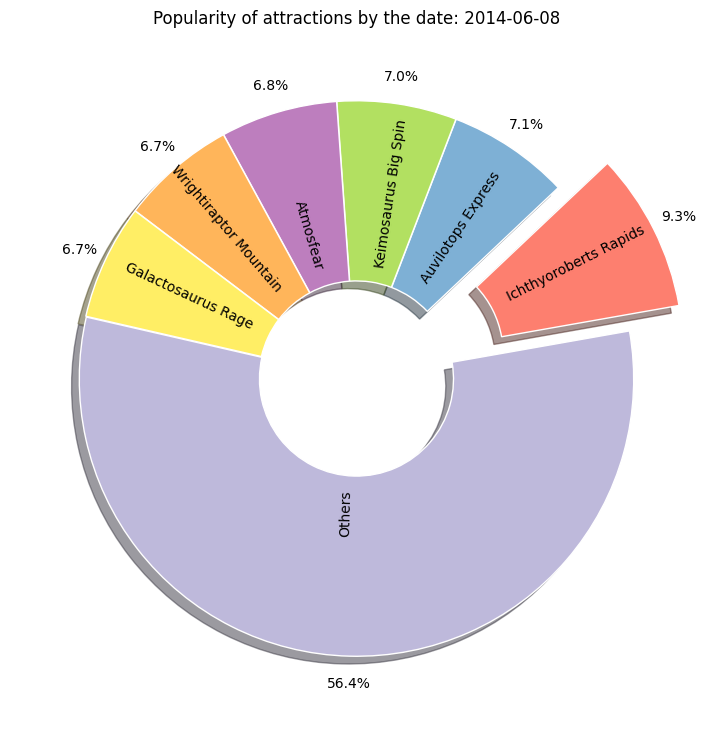

In [134]:
attraction_data_query = """
SELECT AttractionID, Attraction.Name, COUNT(Checkin.attraction) as total_visists
FROM Checkin
JOIN Attraction
ON Checkin.attraction = Attraction.AttractionID
WHERE Category LIKE '%Ride%' AND Checkin.duration NOT LIKE '%@SD' AND Checkin.type LIKE 'actual' AND Checkin.timestamp LIKE {}
GROUP BY AttractionID
ORDER BY total_visists DESC;
"""

data = execute_query(attraction_data_query)

attraction_data_dicts = {
    'Attraction name': [x[1] for x in data],
    'Visits number': [x[2] for x in data]
}

df = pd.DataFrame(attraction_data_dicts)
df = df.sort_values('Visits number', ascending=False)
top_6 = df.iloc[:6]
others = df.iloc[6:].sum()
others_df = pd.DataFrame({'Attraction name': ['Others'],
                          'Visits number': [others['Visits number']]})
df = pd.concat([top_6, others_df])

fig, ax = plt.subplots(figsize=(18, 9))

cmap = plt.get_cmap('hsv', 512)
outer_colors = np.arange(5) * 411

colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

explode_values = np.full_like([float(x) for x in df['Visits number']], 0.002)
min_idx = np.argmax(attraction_data_dicts['Visits number'])
explode_values[min_idx] = 0.2

pie = ax.pie(
    df['Visits number'].values.flatten(),
    radius=1,
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=1.1,
    labels=df['Attraction name'],
    shadow=True,
    startangle=10,
    rotatelabels=True,
    labeldistance=0.4,
    explode=explode_values,
    wedgeprops=dict(width=0.65, edgecolor='w')
)

ax.set(aspect="equal", title=f'Popularity of attractions by the date: {date}')
plt.show()

A Bar Chart depicting total visits to food stalls.

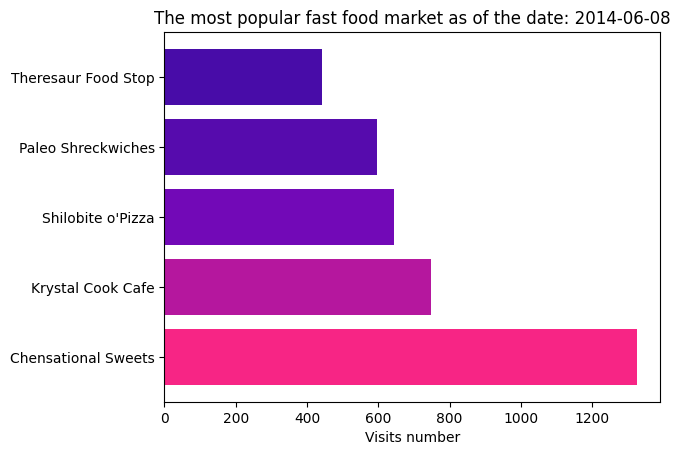

In [135]:
fast_food_data_query = """
SELECT AttractionID, Attraction.Name, COUNT(Checkin.attraction) as total_visists
FROM Checkin
JOIN Attraction
ON Checkin.attraction = Attraction.AttractionID
WHERE Attraction.type LIKE '%Fast Food%' AND Checkin.timestamp LIKE {}
GROUP BY AttractionID
ORDER BY total_visists DESC;
"""

data = execute_query(fast_food_data_query)

fast_food_dicts = {
    'Fast food name': [x[1] for x in data],
    'Visits number': [x[2] for x in data]
}

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(fast_food_dicts['Visits number']))

ax.barh(y_pos, fast_food_dicts['Visits number'], align='center', color=['#f72585', '#b5179e', '#7209b7', '#560bad', '#480ca8'])
ax.set_yticks(y_pos, labels=fast_food_dicts['Fast food name'])
ax.set_xlabel('Visits number')
ax.set_title(f'The most popular fast food market as of the date: {date}')

plt.show()

A Line Chart depicting attendance at the newest ride, Atmosfear over the course of the day.

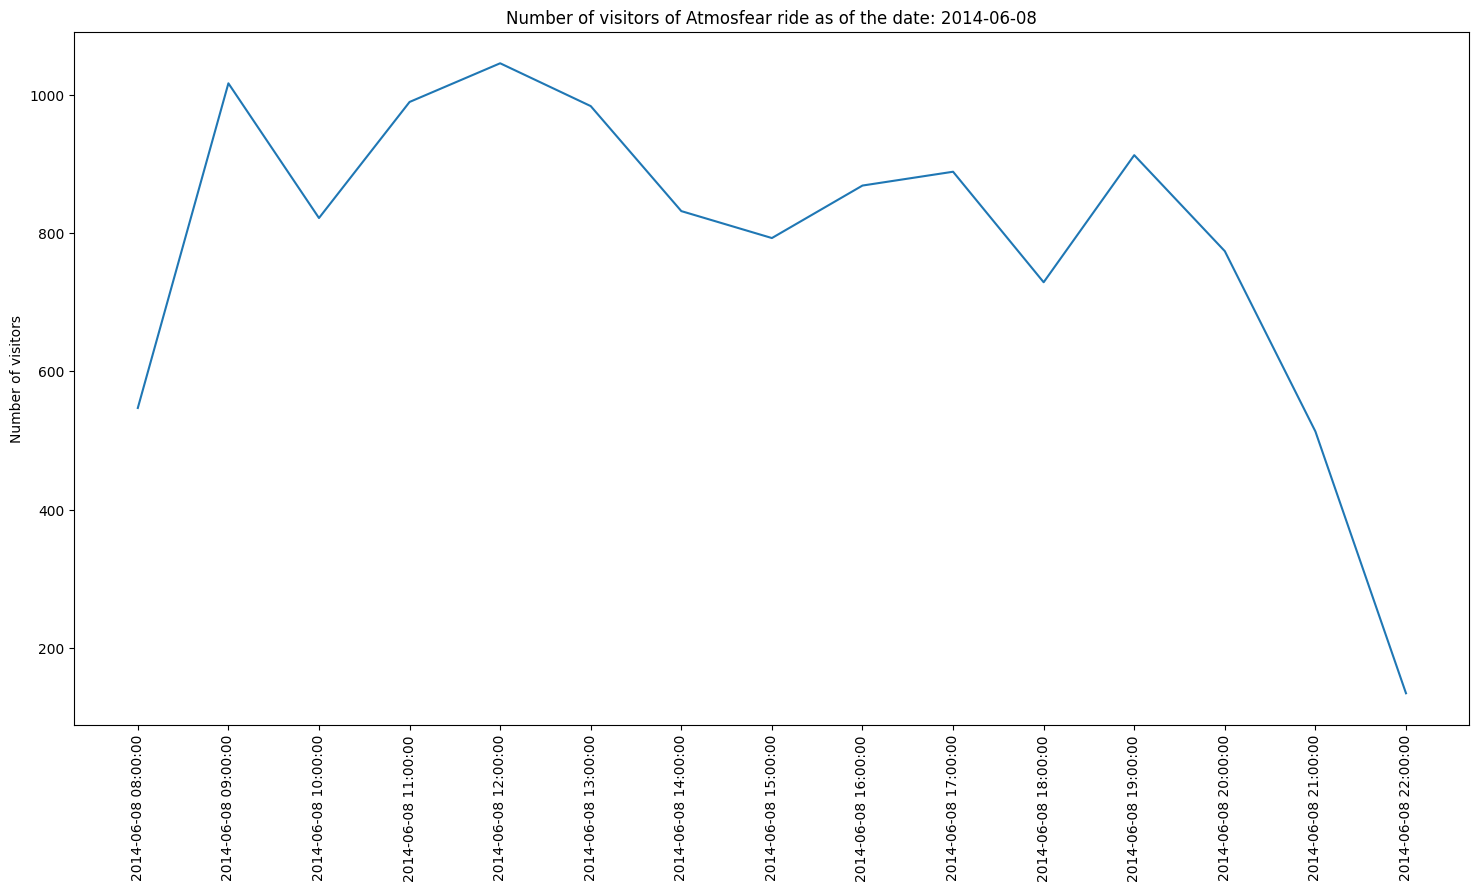

In [136]:
attraction_data_query = """
SELECT Checkin.timestamp
FROM Checkin
WHERE Checkin.attraction = 8 AND Checkin.timestamp LIKE {}
"""

data = execute_query(attraction_data_query)

hour_counts = {}

for date_value in data:
    dt_obj = datetime.strptime(date_value[0], '%Y-%m-%d %H:%M:%S')
    hour_start = dt_obj.replace(minute=0, second=0, microsecond=0)
    hour_key = hour_start.strftime('%Y-%m-%d %H:%M:%S')
    if hour_key in hour_counts:
        hour_counts[hour_key] += 1
    else:
        hour_counts[hour_key] = 1

hour_counts = dict(sorted(hour_counts.items()))

x = list(hour_counts.keys())
y = list(hour_counts.values())

fig, ax = plt.subplots(figsize=(18, 9))
plt.plot(x, y)
plt.xticks(rotation=90)
plt.ylabel('Number of visitors')
plt.title(f'Number of visitors of Atmosfear ride as of the date: {date}')
plt.show()


A Box-and-Whisker Plot depicting total visits to the park's Kiddie Rides.

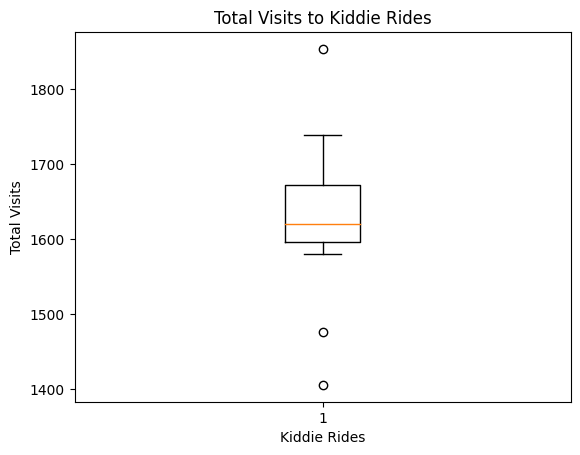

In [137]:
kiddie_rides_data_query = """
SELECT Attraction.Name, COUNT(Checkin.attraction) as total_visists
FROM Checkin
JOIN Attraction
ON Checkin.attraction = Attraction.AttractionID
WHERE Attraction.Category LIKE '%Kiddie Rides%' AND Checkin.timestamp LIKE {}
GROUP BY AttractionID
ORDER BY total_visists DESC;
"""

data = execute_query(kiddie_rides_data_query)

values = [d[1] for d in data]
xticklabels = [d[0] for d in data]

fig, ax = plt.subplots()
ax.boxplot(values)

ax.set_title('Total Visits to Kiddie Rides')
ax.set_xlabel('Kiddie Rides')
ax.set_ylabel('Total Visits')
plt.show()
